# **Esame del 11 settembre 2023**

- Non si possono consultare libri, note, ed ogni altro materiale o persone durante
l'esame ad eccezione delle funzioni Python fornite.

- Risolvere gli esercizi marcati con **[P]** all'interno dell'IPython notebook.

- Svolgere gli esercizi marcati con **[T]** su fogli protocollo, indicando: nome, cognome, codice persona e data

- La durata del compito è di 90 minuti.

- Questo esame è composto da 3 esercizi, per un totale di 30/30 punti.

- All'interno degli script **functions2024.py** e **fem.py** trovate le funzioni necessarie per gli esercizi (che potete quindi importare ed utilizzare liberamente).


In [1]:
# Cella di inizializzazione. Eseguirla prima di iniziare lo svolgimento dell'esame (ed, eventualmente, ad ogni riavvio).
import matplotlib.pyplot as plt
import numpy as np
from fem import install

install()

## **Esercizio 1** &nbsp; &nbsp; <small>(10 punti)</small>

Consideriamo la seguente funzione definita sull'intervallo $[-1,1]$.
</br></br>
$$
f(x) = e^{-\frac{1}{x^2}}
$$
</br>

##### **a) [P]** &nbsp; &nbsp; (3 punti)

Approssimare $f$ mediante interpolazione polinomiale Lagrangiana su nodi equispaziati di grado $n = [5,10,20]$. Riportare graficamente i polinomi interpolanti ottenuti sovrapposti alla funzione $f$ e l'errore in spazio; stampare a schermo il massimo dell'errore nei tre casi,
</br></br>
$$
\text{err}_n = \max_{x\in[-1,1]} |f(x)-\Pi_n f(x)|
$$
</br>
Cosa osserviamo?

*Soluzione.*

Possiamo costruire l'inerpolazione polinomiale Lagrangiana su nodi equispaziati come segue:

<ipython-input-2-6c507a13e993>:10: RuntimeWarning: divide by zero encountered in divide
  fun = lambda x : np.exp(-1/x**2)


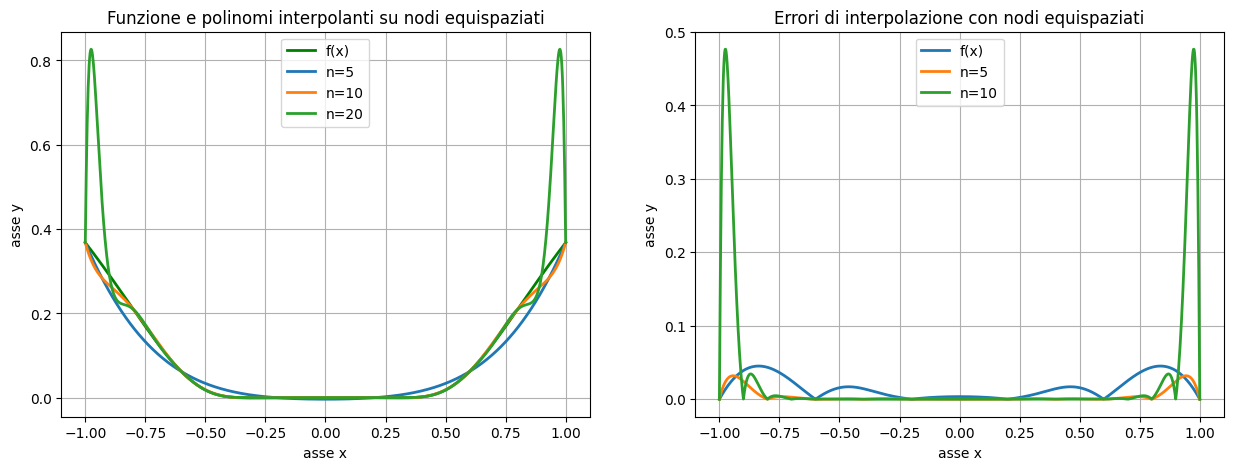

n 		 err 
--------------------
5  	0.045176
10  	0.031945
20  	0.476633


In [2]:
# Punto (a)
import numpy as np
import matplotlib.pyplot as plt

# estremi intervallo
a,b = -1,1
# discretizzazione intervallo a b
x_dis = np.linspace(a,b,1000)
# funzione
fun = lambda x : np.exp(-1/x**2)
# valutazione funzione
f_dis = fun(x_dis)

grado = [5,10,20]
err_max = []

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(x_dis,f_dis,'g',linewidth = 2)
plt.title('Funzione e polinomi interpolanti su nodi equispaziati')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.grid()

plt.subplot(1,2,2)
plt.title('Errori di interpolazione con nodi equispaziati')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.grid()

for n in grado:
  x_nod = np.linspace(a, b, n+1)
  f_nod  = fun(x_nod)
  # uso polyfit e polyval per l'interpolazione polinomiale
  P = np.polyfit(x_nod, f_nod, n)
  poly_dis = np.polyval(P, x_dis)

  plt.subplot(1,2,1)
  plt.plot(x_dis, poly_dis, linewidth = 2)

  err_dis = np.abs(poly_dis - f_dis)
  err_max.append(np.max(err_dis))

  plt.subplot(1,2,2)
  plt.plot(x_dis, err_dis, linewidth = 2)

plt.subplot(1,2,1)
plt.legend(['f(x)', 'n=5', 'n=10', 'n=20'])
plt.subplot(1,2,2)
plt.legend(['f(x)', 'n=5', 'n=10', 'n=20'])

plt.show()

print('n \t\t err \n' + '-'*20)
for n in range(len(grado)):
  print('%d  \t%f' %(grado[n], err_max[n]))


Notiamo che aumentando il grado di approssimazione l'interpolante risulta meno accurato agli estremi dell'intervallo $[-1,1]$, tipico fenomeno Runge associato all'interpolazione polinomiale Lagrangiana su nodi equispaziati. Infine il massimo errore è il seguente:

grado 5  -> errore: 0.045176</br>
grado 10 -> errore: 0.031945</br>
grado 20 -> errore: 0.476633

##### **b) [T]** &nbsp; &nbsp; (4 punti)

Data la soluzione esatta $\mathbf{x} = [1, 1 . . . , 1]^T$ costruire il termine noto $\mathbf{b}$
e risolvere il sistema lineare $A\mathbf{x} = \mathbf{b}$ utilizzando
la fattorizzazione LU seguita dai metodi di sostituzione in avanti e all'indietro (si sfruttino le funzioni fornite). Verificare se è stato effettuato il pivoting.

Si discuta la stabilità e la convergenza dell'interpolazione polinomiale Lagrangiana du nodi equispaziati e su nodi di Chebychev-Gauss-Lobatto.

*Soluzione.*

Data una funzione $f$ definita du $I$ e dati $n+1$ nodi $x_i$, considero la sua interpolazione Lagrangiana data da
</br></br>
$$
\Pi_n f(x) = \sum_{i=0}^n f(x_i)\mathcal{L}_i(x
 = \sum_{i=0}^n y_i \mathcal{L}_i(x),
$$
</br>
dove $\Pi_n$ è l'operatore di interpolazione che data una funzione $f$ restituisce il polinomio interpolatore $\pi_n$ negli $n+1$ punti $x_i$. Considero ora una funzione $\tilde{f}$ ottenuta perturbando $f$: il suo interpolato è dato dalla seguente espressione
</br></br>
$$
 \Pi_n \tilde{f}(x) = \sum_{i=0}^n \tilde{f}(x_i)\mathcal{L}_i(x).
$$
</br>
Possiamo calcolare la differenza tra l'interpolata di $f$ e la sua perturbata per capire come si propagano le perturbazioni
</br></br>
$$
\| \Pi_n f - \Pi_n \tilde{f} \|_{\infty} \leq \max_{i=0,\dots,n} |f(x_i) - \tilde{f}(x_i)| \max_{x\in I} |\sum_{i=0}^n \mathcal{L}_i(x)|
$$
</br>
L'ultimo termine, che non dipende da $f$ ma solo dai valori dei $\mathcal{L}_i$ nei nodi $x_i$, è detto costante di Lebesgue e, per nodi equispaziati, è data da
</br></br>
$$
\Lambda_n = \max_{x\in I} |\sum_{i=0}^n \mathcal{L}_i(x)| ≈ \dfrac{2^{n+1}}{en\log(n+\gamma)}
$$
</br>
tale valore cresce molto all'aumentare di $n$ rendendo quindi non stabile l'interpolazione polinomiale Lagrangiana su nodi equispaziati. Nel caso in cui considerassimo i nodi Chebyschev-Gauss-Lobatto tale costante risulterebbe
</br></br>
$$
\Lambda_n < \dfrac{2}{\pi} \log n
$$
</br>
ha una crescita di tipo logaritmico in $n$.

Per quanto rigruarda la convergenza, non è garantita nel caso di nodi uniformi, ovvero in generale
</br></br>
$$
\lim_{n\to∞}\max_{x\in I} |E_n f(x)| \neq 0.
$$
</br>
Mentre per nodi di Chebychev-Gauss-Lobatto il polinomio intepolatore $\Pi_n f$ è tale che $\Pi_nf → f$ per $n → ∞$, ovvero abbiamo convergenza all'aumentare del grado polinomiale.

##### **c) [P]** &nbsp; &nbsp; (3 punti)

Data la soluzione esatta $\mathbf{x} = [1, 1 . . . , 1]^T$ costruire il termine noto $\mathbf{b}$
e risolvere il sistema lineare $A\mathbf{x} = \mathbf{b}$ utilizzando
la fattorizzazione LU seguita dai metodi di sostituzione in avanti e all'indietro (si sfruttino le funzioni fornite). Verificare se è stato effettuato il pivoting.

Ripetere quanto fatto al **punto a)** per nodi di Chebyschev-Gauss-Lobatto.

*Soluzione.*

Possiamo costruire l'interpolazione polinomiale Lagrangiana su nodi di Chebyschev-Gauss-Lobatto come segue:

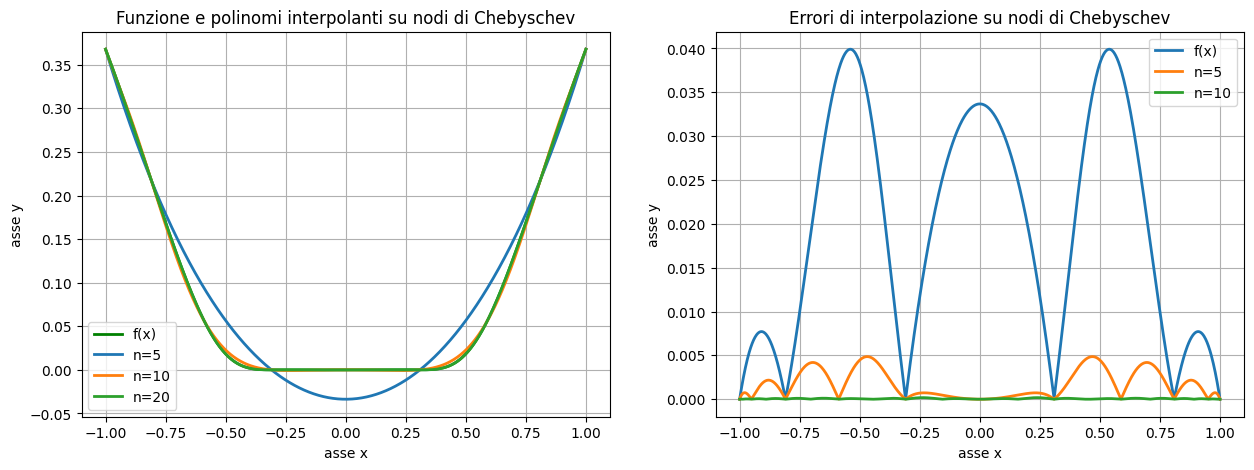

n 		 err 
---------------
5  	0.039914
10  	0.004859
20  	0.000179


In [3]:
#Punto (c)
import numpy as np
import matplotlib.pyplot as plt

# estremi intervallo
a,b = -1,1
# discretizzazione intervallo a b
x_dis = np.linspace(a,b,1000)
# funzione
fun = lambda x : np.exp(-1/x**2)
# valutazione funzione
f_dis = fun(x_dis)

grado = [5,10,20]
err_max = []

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(x_dis,f_dis,'g',linewidth = 2)
plt.title('Funzione e polinomi interpolanti su nodi di Chebyschev')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.grid()

plt.subplot(1,2,2)
plt.title('Errori di interpolazione su nodi di Chebyschev')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.grid()

for n in grado:
  ## nodi di chebychev
  k = np.arange(n+1)
  t = -np.cos(np.pi*k/n)
  # trasformazione lineare
  x_nod = (a+b)/2 + ((b-a)/2)*t

  f_nod  = fun(x_nod)
  P = np.polyfit(x_nod, f_nod, n)
  poly_dis = np.polyval(P, x_dis)

  plt.subplot(1,2,1)
  plt.plot(x_dis, poly_dis, linewidth = 2)

  err_dis = np.abs(poly_dis - f_dis)
  err_max.append(np.max(err_dis))

  plt.subplot(1,2,2)
  plt.plot(x_dis, err_dis, linewidth = 2)

plt.subplot(1,2,1)
plt.legend(['f(x)', 'n=5', 'n=10', 'n=20'])
plt.subplot(1,2,2)
plt.legend(['f(x)', 'n=5', 'n=10', 'n=20'])

plt.savefig('ese1_sol_c.png')
plt.show()

print('n \t\t err \n' + '-'*15)
for n in range(len(grado)):
  print('%d  \t%f' %(grado[n], err_max[n]))


Notiamo che aumentando il grado di approssimazione l'interpolante risulta più accurata su tutto l'intervallo $[-1,1]$, non abbiamo più fenomeno di Runge associato all'interpolazione polinomiale Lagrangiana su nodi equispaziati.

Il massimo dell'errore che otteniamo è il seguente:


grado 5  -> errore: 0.039914</br>
grado 10 -> errore: 0.004859</br>
grado 20 -> errore: 0.000179

## **Esercizio 2** &nbsp; &nbsp; <small>(10 punti)</small>

Dato $n=20$, si vuole risolvere il sistema lineare $A\mathbf{x} =\mathbf{b}$ dove A è tridiagonale, con $2$ sulla diagonale principale e $-1$ sulle sotto/sopra-diagonali, mentre $\mathbf{b}$ è un vettore di 1. Entrambi potete generarli con i seguenti comandi
    import numpy as np

    A = np.diag(2*np.ones(n)) - np.diag(np.ones(n-1),1)- np.diag(np.ones(n-1),-1)
    b = np.ones(n) *testo in corsivo*

Nei seguenti punti si fissi una tolleranza per il criterio di arresto
pari a $1e-8$, un numero massimo di iterazioni pari a $1000$ e il valore iniziale $x_0 = [0, \ldots, 0]^\top$.


##### **a) [T]** &nbsp; &nbsp; (4 punti)

Si introduca un generico metodo iterativo basato sulla matrice di iterazione $B$ per la risoluzione di un sistema
lineare. Si riporti e dimostri il risultato sulla condizione necessaria e sufficiente di convergenza per tale metodo.


*Soluzione.*

Un metodo iterativo costruisce una successione $\{\mathbf{x}^k\}$, dove ogni $\mathbf{x}^k\in\mathbb{R}^n$, che converge alla soluzione $\mathbf{x}$ per $k\rightarrow\infty$.

Abbiamo quindi
</br></br>
$$
\mathbf{x}^0\ \xrightarrow{\text{un passo}}\
\mathbf{x}^1\ \xrightarrow{\text{un passo}}\
\mathbf{x}^2\ \xrightarrow{\text{un passo}}\
\ldots\ \xrightarrow{\text{un passo}}\
\mathbf{x}^k\ \xrightarrow{k \rightarrow \infty}\
\mathbf{x}.
$$
</br>
Una forma generale per i metodi iterativi è data dall'espressione seguente
</br></br>
$$
    \mathbf{x}^{k+1} = B \mathbf{x}^k + \mathbf{g},
$$
</br>
dove $B\in\mathbb{R}^{n \times n}$ è detta matrice di iterazione, che
generalmente può dipendere da $A$, e $\mathbf{g}$ un vettore che viene costruito partendo da $A$ e $\mathbf{b}$.

Il metodo iterativo è detto consistente se $B$ e $\mathbf{g}$ sono tali che
</br></br>
$$
    \mathbf{x} = B \mathbf{x} + \mathbf{g},
$$
</br>
ossia se la soluzione esatta soddisfa esattamente il metodo numerico.
Un metodo iterativo consistente della forma
</br></br>
$$
    \mathbf{x}^{k+1} = B \mathbf{x}^k + \mathbf{g},
$$
</br>
è convergente se e solo se
$$
    \rho(B) < 1,
$$
</br>
Mostriamo l'implicazione che se il raggio spettrale soddisfa $\rho(B)< 1$ allora il metodo è convergente. Essendo per ipotesi un metodo
consistente, allora vale
</br></br>
$$
    \mathbf{e}^{k+1} = B \mathbf{e}^k,
$$
</br>
inoltre, ripetendo il ragionamento per $k-1$, $k-2$ ... si ottiene che
</br></br>
$$
    \mathbf{e}^{k+1} = B^{k+1} \mathbf{e}^0.
$$
</br>
Dato che $\rho(B) < 1$ sappiamo che $\lim_{k\rightarrow\infty} B^{k}=0$, quindi otteniamo che
</br></br>
$$
    \lim_{k\rightarrow\infty} \mathbf{e}^{k+1} = \lim_{k\rightarrow\infty} B^{k+1}\mathbf{e}^0=\mathbf{0}.
$$
</br>

Mostriamo ora l'implicazione inversa, ovvero vogliamo mostrare che se il
raggio spettrale è maggiore di 1 allora il metodo non è convergente.
Supponiamo che $\rho(B) \geq 1$, cioè esiste almeno un autovalore
$\lambda$ di $B$ tale che $|\lambda|\geq1$. Scelgo $\mathbf{x}^0$ tale
che l'errore iniziale, $\mathbf{e}^0 = \mathbf{x} - \mathbf{x}^0$, sia uguale
all'autovettore associato a $\lambda$. Abbiamo quindi
</br></br>
$$
    B \mathbf{e}^0 = \lambda \mathbf{e}^0
$$
</br>
e otteniamo che l'errore al passo $k$ si esprime come
</br></br>
$$
\mathbf{e}^k = B \mathbf{e}^{k-1} = B^2 \mathbf{e}^{k-2} = \ldots = B^k \mathbf{e}^0 = \lambda^k \mathbf{e}^0
$$
</br>
Quest'ultima espressione non può convergere a zero per $k\rightarrow
\infty$ dato che $|\lambda| > 1$. Quindi il raggio spettrale della
matrice di iterazione per un metodo convergente deve necessariamente
essere minore di 1.

##### **b) [P+T]** &nbsp; &nbsp; (3 punti)

Si introduca la matrice di iterazione $B_J$ di Jacobi,
si verifichi che tale metodo soddisfa la condizione necessaria e sufficiente per la convergenza e si risolva il sistema lineare usando la funzione $\verb|Jacobi_Bc|$. Calcolando il residuo
normalizzato su $\mathbf{b}$, cosa osserviamo?

*Soluzione.*

Possiamo definire la matrice di iterazione $B_J$ e il vettore $\mathbf{g}$
associati al metodo di Jacobi come
\begin{gather*}
    \mathbf{g} = D^{-1} \mathbf{b}.
    \quad \text{e} \quad
    B_J = D^{-1} (D-A) = I - D^{-1}A
\end{gather*}
dove $D = \text{diag}(A)$. Per verificare la convergenza e calcolare la soluzione
corrispondente utilizziamo il seguente script


In [4]:
## dimensione, matrice A e vettore b
import numpy as np
from functions2024 import Jacobi_Bc
from functions2024 import iterative_solve
from scipy.linalg import eigvals

n = 20;
A = np.diag(2*np.ones(n)) - np.diag(np.ones(n-1),1)- np.diag(np.ones(n-1),-1)
b = np.ones(n)

## punto 2

# definizione della matrice di iterazione di Jacobi
Bj = Jacobi_Bc(A)

# test sulla convergenza
print("Raggio spettrale: %.15f" %np.max(np.abs(eigvals(Bj))))

#soluzione con Jacobi
nmax = 1000;
toll = 1e-8;
x0 = np.ones(n);
xj = iterative_solve(A, b, x0, 'Jacobi', nmax, toll);

#calcolo errore
err = np.linalg.norm(b - A@xj[-1]) / np.linalg.norm(b);
# stampo numero di iterazioni (il vettore è 1001 perchè il primo elemento è x0)
print("Numero iterazioni: %d" %(len(xj)-1))
# stampo l'errore
print("Errore: %e" %err)

Raggio spettrale: 0.988830826225130
Numero iterazioni: 1000
Errore: 1.192241e-05


Ottenendo il seguente risultato

      0.9888308262251297
      1000
      1.1922e-05

Ovvero il raggio spettrale $\rho(B_j)$ risulta molto prossimo a 1 e quindi ci
aspettiamo una convergenza piuttosto lenta. Otteniamo infatti che l'algoritmo
non raggiunge la tolleranza specificata in 1000 iterazioni ma ne richiederebbe
di più.

##### **c) [P+T]** &nbsp; &nbsp; (3 punti)

Si introduca la matrice di iterazione $B_{GS}$ di Gauss-Seidel,
si verifichi che tale metodo è convergente e si risolva il
sistema lineare usando la funzione $\verb|GS_Bc|$.
Calcolando il residuo
normalizzato su $\mathbf{b}$, cosa osserviamo?

*Soluzione.*

Scomponiamo la matrice $A$ come $A = D - E - F$ dove
</br></br>
$$
    D =
    \begin{bmatrix}
        a_{11} & 0 & \ldots & & 0\\
        0 & a_{22} & 0 & \ldots & 0\\
        \ldots\\
        0 & & \ldots & 0 & a_{nn}
    \end{bmatrix}
    \quad
    E =
    \begin{bmatrix}
        0 & 0 & \ldots & & 0\\
        -a_{21} & 0 & 0 & \ldots & 0\\
        \ldots\\
        -a_{n1} & & \ldots & -a_{n, n-1} & 0
    \end{bmatrix}
    \\
    F =
    \begin{bmatrix}
        0 & -a_{12} & \ldots & & -a_{1n}\\
        0 & 0 & -a_{23} & \ldots & -a_{2n}\\
        \ldots\\
        0 & & \ldots & 0 & 0
    \end{bmatrix}.
$$
</br>
La matrice di iterazione di Gauss-Seidel è data da
</br></br>
$$
    B_{GS} = (D-E)^{-1} F
$$
</br>
Per verificare la convergenza e calcolare la soluzione
corrispondente utilizziamo il seguente script

In [5]:
## punto 3
from functions2024 import GS_Bc
# definizione della matrice di iterazione di Jacobi
Bgs = GS_Bc(A)

# test sulla convergenza
print("Raggio spettrale: %.15f" %np.max(np.abs(eigvals(Bgs))))

#soluzione con Gauss-Seidel
nmax = 1000;
toll = 1e-8;
x0 = np.ones(n);
x_gs = iterative_solve(A, b, x0, 'GS', nmax, toll);

#calcolo errore
err = np.linalg.norm(b - A@x_gs[-1]) / np.linalg.norm(b);
# stampo numero di iterazioni
print("Numero iterazioni: %d" %(len(x_gs)-1))
# stampo l'errore
print("Errore: %e" %err)

Raggio spettrale: 0.977786402893070
Numero iterazioni: 817
Errore: 9.867607e-09


Ottenendo il seguente risultato

    0.977786402893070
    817
    9.8676e-09

In questo caso il raggio spettrale è minore del metodo di Jacobi, ci
aspettiamo una convergenza più rapida alla soluzione. Infatti l'algoritmo terma entro il numero massimo di iterazioni impostate. Tale risultato è in linea con quanto predetto dalla teoria.

## **Esercizio 3** &nbsp; &nbsp; <small>(10 punti)</small>

Si consideri il seguente problema
</br></br>
$$
\begin{cases}
-u^{\prime\prime} = 2\pi^2\sin(2\pi x) & 0< x< 1,\\
u(0)=0 \\
u^\prime(1)=\pi
\end{cases}
$$
</br>



##### **a) [T]** &nbsp; &nbsp; (1 punto)

Determinare il valore di $A$ tale per cui $u(x)=A\sin(2\pi x)$ è soluzione esatta del problema.


*Soluzione.*


Verifichiamo innanzitutto che $-u^{\prime\prime}=-4\pi^2 A(-\sin(Ax))$ è pari alla forzante data se $A=\frac{1}{2}$; inoltre $u(0)=0\;\forall A$. Calcoliamo $u^\prime(1)$ e verifichiamo se la condizione di Neumann è soddisfatta:

\begin{align*}
  2\pi \frac{1}{2}\cos(2\pi)&=\pi\\
  \pi&=\pi
 \end{align*}




##### **b) [T]** &nbsp; &nbsp; (4 punti)

Introdurre brevemente l'approssimazione del problema con il metodo degli elementi finiti in spazio e derivarne
l'espressione matriciale considerando le condizioni al contorno del problema in esame.


*Soluzione.*

Dato che abbiamo una condizione di Dirichlet nel bordo sinistro, in $x=0$, consideriamo lo spazio funzionale $V= \left\{ v \in H^1(\Omega): \, v(0) = 0 \right\}$
e prendiamo delle funzioni test $v \in V$; la forma
debole del problema è: trovare $u(x) \in V$ tale che
</br></br>
  \begin{gather*}
  a(u,v) = F(v) \qquad
    \forall v \in V.
\end{gather*}
</br>
dove $a(u,v)=\int_0^1 u^\prime v^\prime dx$ e $F(v)=\int_0^1 f v - g v(1)$.
</br>

Nel nostro caso $f= 2\pi^2\sin(2\pi x)$ e $g=\pi$. Notiamo che il termine di
bordo è nullo sul bordo sinistro mentre la condizione di Neumann sul bordo
destro è inclusa nel funzionale.

La formulazione discreta del problema è ottenuta scegliendo un
sotto-spazio finito dimensionale  $V_h \subset V$ per cui possiamo
considerare una base $\{\phi_j\}$ per $V_h$ di funzioni linearmente
indipendenti. Nel nostro caso, data una griglia di $N+2$ nodi in cui
$x_0=0$, $x_{N+1}=1$, e spaziatura $h=\frac{b-a}{N+1}$ la base è formata
dalle funzioni "a capanna" $\phi_j$ con $j=1,\ldots N+1$; infatti,
considerando lo sviluppo
</br></br>
\begin{gather*}
    u_h(x) = \sum_{j=1}^{N_h} u_j \phi_j (x)
\end{gather*}
</br>
le incognite sono i valori $u_j$ in tutti i nodi eccetto il primo, per un totale di $N+1$ incognite.

Sfruttando la bi-linearità della forma $a$, il fatto che il dominio non
dipende dal tempo e la linearità del funzionale $F$ otteniamo un sistema di $N+1$ equazioni
</br></br>
\begin{gather*}
    A \mathbf{u}  =  \mathbf{f}
\end{gather*}
</br>
  dove la matrice di rigidezza $A$
  </br></br>
\begin{gather*}
    A \in \mathbb{R}^{N+1 \times N+1}: \quad a_{ij} = a\left(\phi_j,
    \phi_i\right)
\end{gather*}
</br>
In particolare otteniamo la seguente struttura:
</br></br>
\begin{gather*}
A =
\frac{1}{h}
\begin{bmatrix}
    2 & -1 & 0 & 0 & 0 & \ldots & 0\\
    -1 & 2 & -1 & 0 & 0 & \ldots & 0\\
    0 & -1 & 2 & -1 & 0 & \ldots & 0\\
    \ldots\\
    0 & \ldots & 0 & 0 & -1 & 2 & -1\\
    0 & \ldots & 0 & 0 & 0 & -1 & 1
\end{bmatrix}
\end{gather*}
</br>
mentre il termine noto $\mathbf{f}$ contiene, nell'ultima riga, il contributo della condizione di Neumann.

##### **c) [P]** &nbsp; &nbsp; (2 punti)
Si consideri una griglia di ampiezza uniforme $h=\frac{1}{10}$. Si risolva il
problema con il metodo degli elementi finiti lineari, utilizzando le function in **fem.py**. Si rappresenti in un grafico la soluzione numerica sovrapposta alla soluzione esatta.

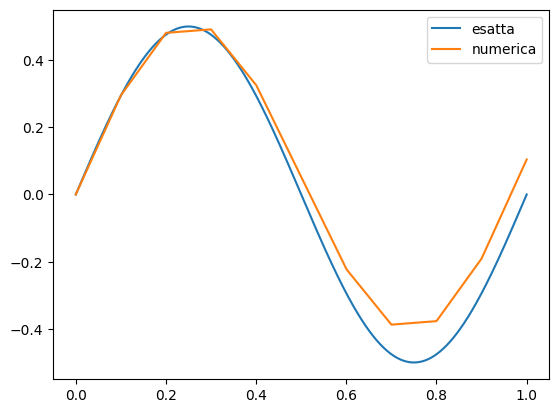

In [6]:
from fem import Line, generate_mesh, FEspace, plot
from fem import interpolate, assemble, dx, ds, deriv

h = 0.1

# dominio/mesh e spazio FEM
domain = Line(0, 1)
mesh = generate_mesh(domain, stepsize = h)

V = FEspace(mesh, 1)

uex = lambda x: np.sin(2*np.pi*x)*0.5;
xplot=np.linspace(0,1,1000);
plt.plot(xplot, uex(xplot))

# Assemblaggio del termine noto
# forzante
f = lambda x: 2*np.pi*np.pi*np.sin(2*np.pi*x)
fh = interpolate(f, V)

# neumann boundary condition
phi = lambda x: np.pi*x
phih = interpolate(phi, V)

def l(v):
  return fh*v*dx + phih*v*ds
F = assemble(l, V)

# Assemblaggio della matrice del sistema
def a(u, v):
  return deriv(u)*deriv(v)*dx
A = assemble(a, V)

from fem import DirichletBC, applyBCs
def isLeftNode(x):
  return x < 1e-12

dbc = DirichletBC(isLeftNode, 0.0)
A = applyBCs(A, V, dbc)
F = applyBCs(F, V, dbc)

from scipy.sparse.linalg import spsolve
u = spsolve(A, F)

from fem import dof2fun
u = dof2fun(u, V)

plot(u)
plt.legend(['esatta', 'numerica'])
plt.show()


##### **d) [P+T]** &nbsp; &nbsp; (4 punti)

Si ripeta il calcolo della soluzione numerica per valori di al variare di $h$ con $h=\frac{1}{N}$, $N=20,40,80$. Calcolare l'errore e rappresentarne l'andamento in scala logaritmica. Commentare il risultato alla luce della teoria.




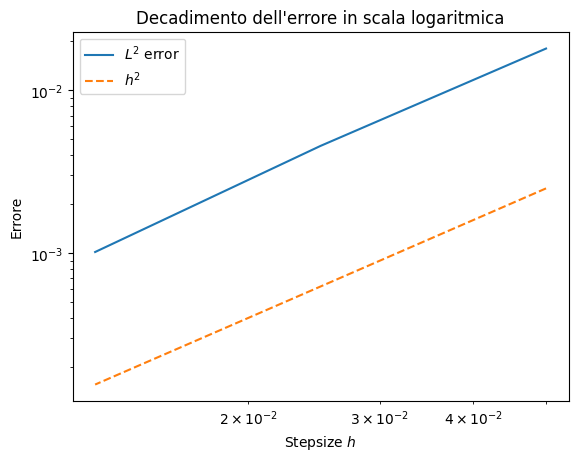

In [7]:
from fem import L2error
#Definiamo un vettore per i passi della griglia e una lista vuota per gli errori

# grado
r = 1

h = np.array([1/20, 1/40, 1/80])
errors = []

for stepsize in h:
  # Generazione della mesh e dello spazio V
  mesh = generate_mesh(domain, stepsize = stepsize)
  V = FEspace(mesh, r)

  # Assemblaggio del termine noto + neumann bc
  fh = interpolate(f, V)
  phih = interpolate(phi, V)

  def l(v):
    return fh*v*dx + phih*v*ds
  F = assemble(l, V)

  # Assemblaggio della matrice del sistema
  def a(u, v):
    return deriv(u)*deriv(v)*dx
  A = assemble(a, V)

  def isLeftNode(x):
    return x < 1e-12

  dbc = DirichletBC(isLeftNode, 0.0)
  A = applyBCs(A, V, dbc)
  F = applyBCs(F, V, dbc)

  uh = spsolve(A, F)
  uh = dof2fun(uh, V)

  # Calcolo dell'errore
  errors.append(L2error(uex, uh, domain))

errors = np.array(errors)

# rappresentazione grafica
plt.loglog(h, errors , label = '$L^2$ error')
plt.loglog(h, h**(r+1), '--', label = '$h^%d$' % (r+1))
plt.legend()
plt.title("Decadimento dell'errore in scala logaritmica")
plt.xlabel("Stepsize $h$")
plt.ylabel("Errore")
plt.show()

*Commento*

Notiamo che l'errore diminuisce quadraticamente come previsto dalla teoria.